# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

---
## Risoluzione
---

Nel presente esercizio si sviluppa una simulazione di **Dinamica Molecolare**

$E^*=\frac{E}{\varepsilon}$ $P^*=\frac{P\sigma^3}{\varepsilon}$ $\rho^*=\rho\sigma^3$ $T^*=\frac{k_BT}{\varepsilon}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

In [2]:
sigma = 0.34*10**-9 # [m]
kb = 1.380649*10**-23 # [J/K]
eps = 120. * kb # [J]
m = 39.948 * 1.66054*10-27 # [kg]
mol = 6.022 *10**20 #millimole

In [3]:
data=[[],[],[]]
title = ['Temperature','Pressure','Total Energy','Kinetic Energy','Potential Energy']
file = ['temperature','pressure','total_energy','kinetic_energy','potential_energy']
lab = ['K','Pa','kJ/mol','kJ/mol','kJ/mol']
m = [120.,eps/(sigma**3),eps*mol,eps*mol,eps*mol]
type = ['Solid','Liquid','Gas']
col = ['r','g','b']
ec = ['orange','lightgreen','lightblue']

In [4]:
dats = len(title)
for j in range(0,3):
    for i in range(0,dats):
        data[j].append(np.loadtxt('OUTPUT/'+type[j]+'/'+file[i]+'.dat',delimiter='\t',skiprows=1))

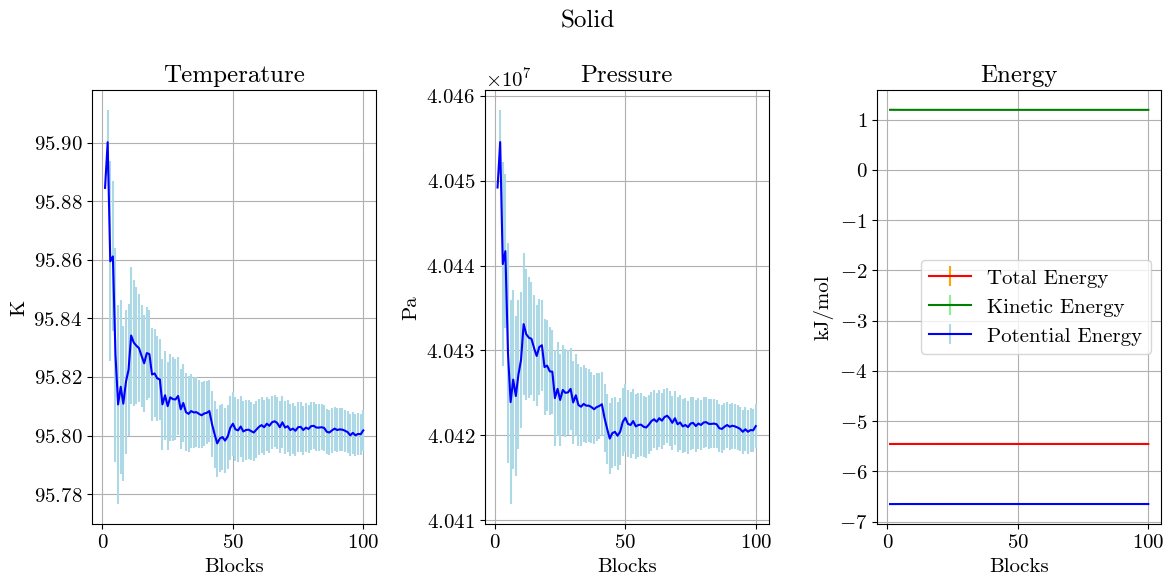

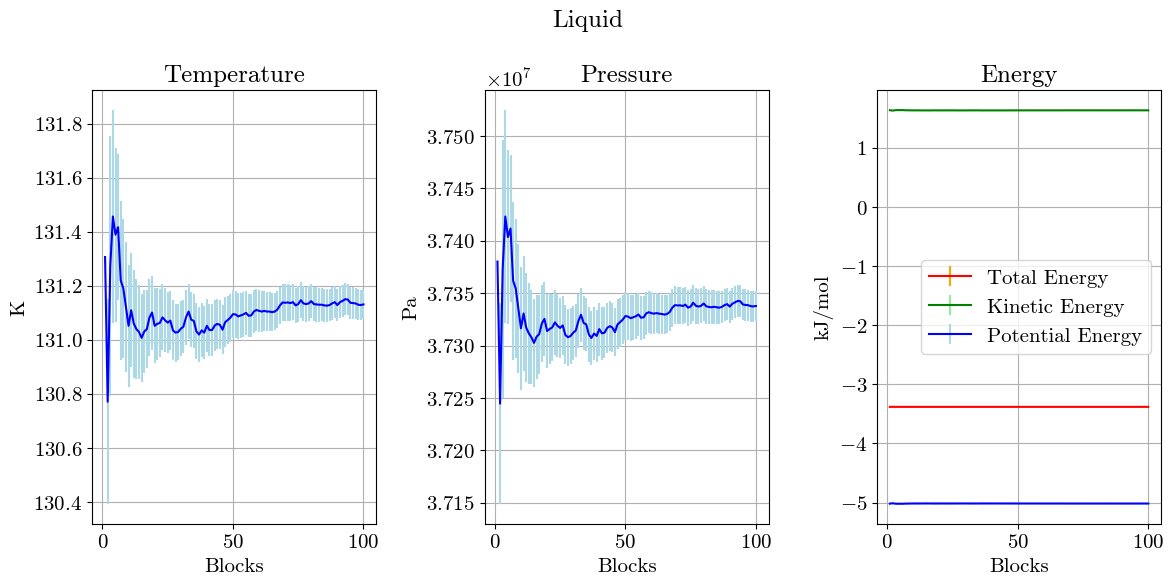

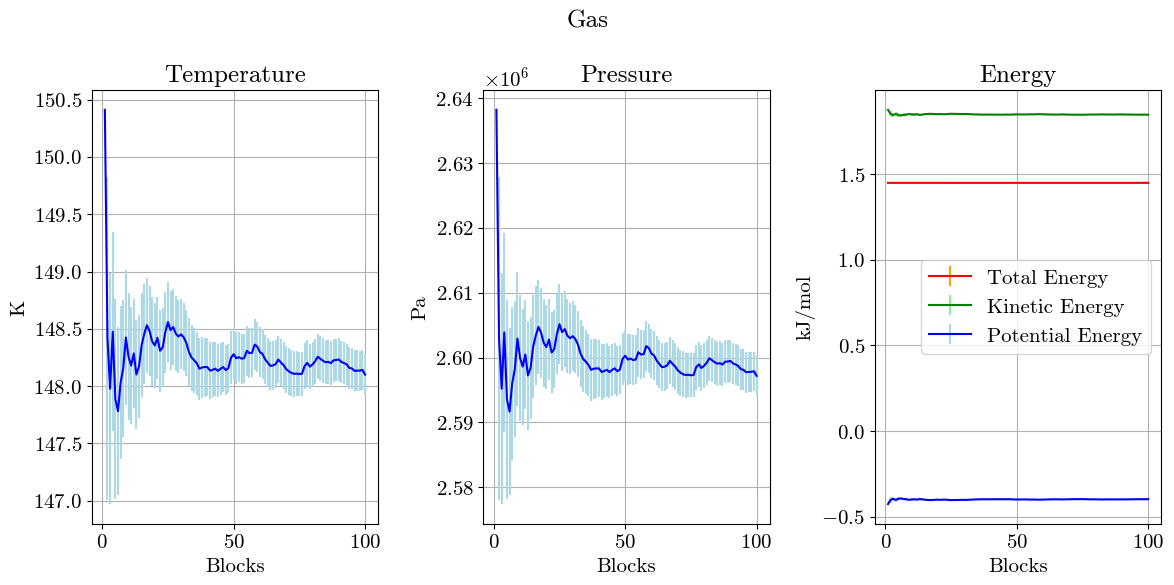

In [5]:
for j in range(0,3):
    plt.figure(figsize=(12,6))
    for i in range(0,2):
        plt.subplot(1,3,i+1)
        x=data[j][i][:,0]
        y=data[j][i][:,2]*m[i]
        err=data[j][i][:,3]*m[i]
        plt.errorbar(x,y,err,color='b',ecolor='lightblue')
        plt.ylabel(lab[i])
        plt.xlabel('Blocks')
        plt.title(title[i])
        plt.grid()
    plt.subplot(1,3,3)
    for i in range(2,dats):
        x=data[j][i][:,0]
        y=data[j][i][:,2]*m[i]
        err=data[j][i][:,3]*m[i]
        plt.errorbar(x,y,err,color=col[i-2],ecolor=ec[i-2],label=title[i])
    plt.ylabel(lab[3])
    plt.xlabel('Blocks')
    plt.title('Energy')
    plt.legend()
    plt.grid()
    plt.suptitle(type[j])
    plt.tight_layout()
    plt.show()

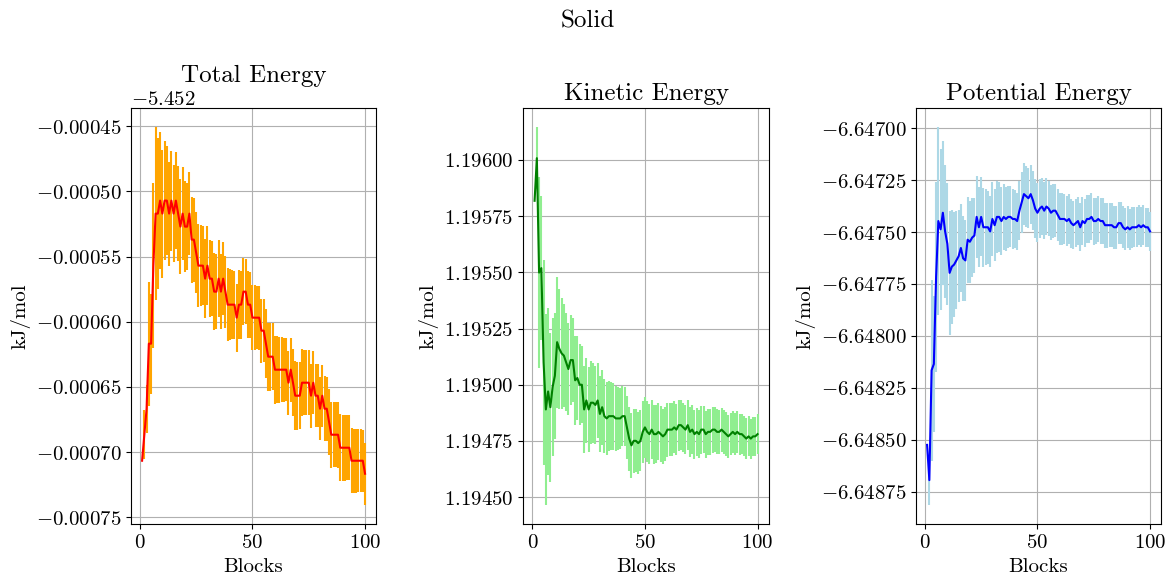

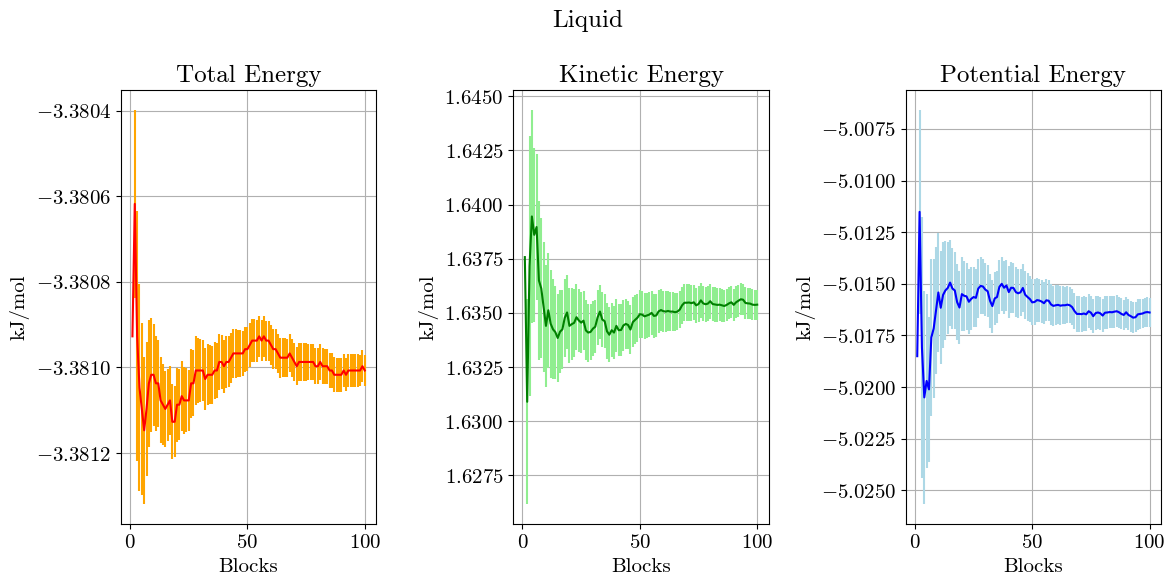

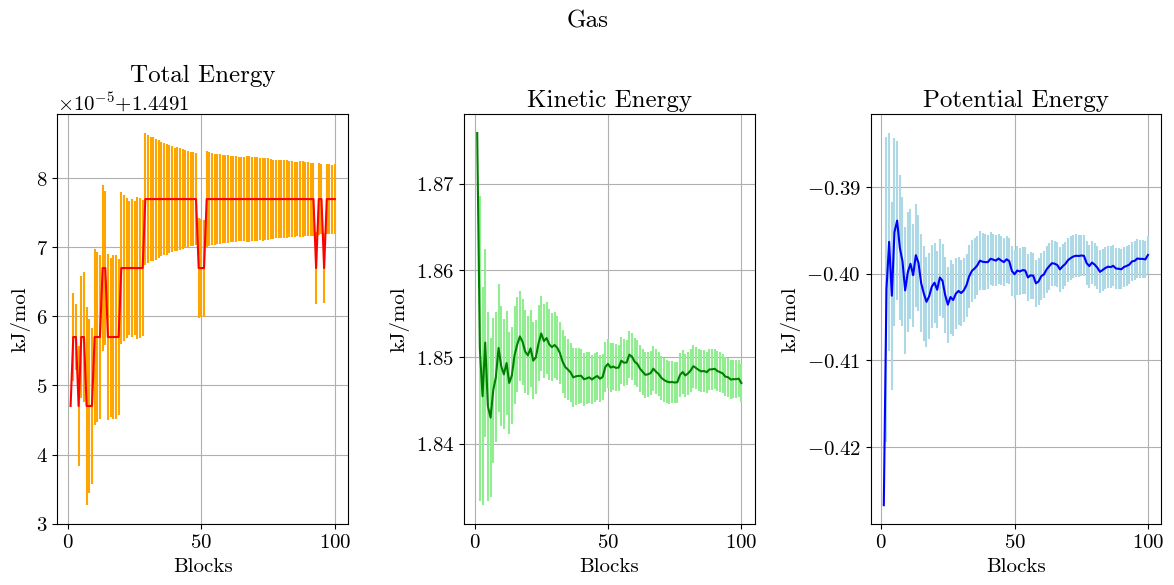

In [8]:
for j in range(0,3):
    plt.figure(figsize=(12,6))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        x=data[j][i+2][:,0]
        y=data[j][i+2][:,2]*m[i+2]
        err=data[j][i+2][:,3]*m[i+2]
        plt.errorbar(x,y,err,color=col[i],ecolor=ec[i])
        plt.ylabel(lab[i+2])
        plt.xlabel('Blocks')
        plt.title(title[i+2])
        plt.grid()

    plt.suptitle(type[j])
    plt.tight_layout()
    plt.show()